importing the data and printing the raw data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import pandas as pd
df=pd.read_excel("/content/AssignmentData.xlsx")
print(df)

                     Date Quarter Department  Targeted Productivity  Overtime  \
0     2015-01-01 00:00:00      Q1     Sewing                   0.80      7080   
1     2015-01-01 00:00:00      Q1  Finishing                   0.75       960   
2     2015-01-01 00:00:00      Q1     Sewing                   0.80      3660   
3     2015-01-01 00:00:00      Q1     Sewing                   0.80      3660   
4     2015-01-01 00:00:00      Q1     Sewing                   0.80      1920   
...                   ...     ...        ...                    ...       ...   
1192  2015-11-03 00:00:00      Q2  Finishing                   0.75       960   
1193  2015-11-03 00:00:00      Q2  Finishing                   0.70       960   
1194  2015-11-03 00:00:00      Q2  Finishing                   0.65       960   
1195  2015-11-03 00:00:00      Q2  Finishing                   0.75      1800   
1196  2015-11-03 00:00:00      Q2  Finishing                   0.70       720   

      No. of Workers  Actua

checking the NaN values

In [ ]:
# Check if any value is NaN in the entire DataFrame
nan_locations = df.isnull()
print(nan_locations)

# Count the number of NaN values in each column
nan_counts = nan_locations.sum()
print(nan_counts)

# Check if NaN values are less or more
if nan_counts.sum() < len(df) * len(df.columns) / 2:
    print("NaN values are relatively less in the dataset.")
else:
    print("NaN values are relatively more in the dataset.")

       Date  Quarter  Department  Targeted Productivity  Overtime  \
0     False    False       False                  False     False   
1     False    False       False                  False     False   
2     False    False       False                  False     False   
3     False    False       False                  False     False   
4     False    False       False                  False     False   
...     ...      ...         ...                    ...       ...   
1192  False    False       False                  False     False   
1193  False    False       False                  False     False   
1194  False    False       False                  False     False   
1195  False    False       False                  False     False   
1196  False    False       False                  False     False   

      No. of Workers  Actual Productivity  
0              False                False  
1              False                False  
2              False                Fal

treating NaN values

In [ ]:
#filling missing values in the ‘Actual Productivity’ column with the median
data_imputed = df.copy()
data_imputed['Actual Productivity'].fillna(data_imputed['Actual Productivity'].median(), inplace=True)
print(data_imputed)

#Check if any value is NaN in the entire DataFrame
has_nan = data_imputed.isnull().values.any()
if has_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain NaN values.")

                     Date Quarter Department  Targeted Productivity  Overtime  \
0     2015-01-01 00:00:00      Q1     Sewing                   0.80      7080   
1     2015-01-01 00:00:00      Q1  Finishing                   0.75       960   
2     2015-01-01 00:00:00      Q1     Sewing                   0.80      3660   
3     2015-01-01 00:00:00      Q1     Sewing                   0.80      3660   
4     2015-01-01 00:00:00      Q1     Sewing                   0.80      1920   
...                   ...     ...        ...                    ...       ...   
1192  2015-11-03 00:00:00      Q2  Finishing                   0.75       960   
1193  2015-11-03 00:00:00      Q2  Finishing                   0.70       960   
1194  2015-11-03 00:00:00      Q2  Finishing                   0.65       960   
1195  2015-11-03 00:00:00      Q2  Finishing                   0.75      1800   
1196  2015-11-03 00:00:00      Q2  Finishing                   0.70       720   

      No. of Workers  Actua

In [ ]:
# Check for duplicate rows in the entire DataFrame
has_duplicates = data_imputed.duplicated().any()

if has_duplicates:
    print("The DataFrame contains duplicate values.")
else:
    print("The DataFrame does not contain duplicate values.")

# Find duplicate rows based on all columns
duplicate_rows = data_imputed[data_imputed.duplicated()]

# Display the duplicate rows
print(duplicate_rows)

The DataFrame contains duplicate values.
                     Date Quarter Department  Targeted Productivity  Overtime  \
3     2015-01-01 00:00:00      Q1     Sewing                   0.80      3660   
27    2015-03-01 00:00:00      Q1     Sewing                   0.80      7080   
31    2015-03-01 00:00:00      Q1     Sewing                   0.80      6720   
69    2015-05-01 00:00:00      Q1     Sewing                   0.80      6780   
73    2015-05-01 00:00:00      Q1     Sewing                   0.80      7200   
75    2015-05-01 00:00:00      Q1     Sewing                   0.80      6900   
89    2015-06-01 00:00:00      Q1     Sewing                   0.80     10620   
93    2015-06-01 00:00:00      Q1     Sewing                   0.80     10350   
97    2015-06-01 00:00:00      Q1     Sewing                   0.80     10170   
107   2015-07-01 00:00:00      Q1     Sewing                   0.80     10620   
115   2015-07-01 00:00:00      Q1     Sewing                   0.80 

In [ ]:
# Remove duplicate rows (keep the first occurrence)
data_cleaned = data_imputed.drop_duplicates()

# Print the number of removed duplicate rows
num_removed = len(data_imputed) - len(data_cleaned)
print(f"Removed {num_removed} duplicate rows.")


Removed 36 duplicate rows.


dropping dupicate values

In [ ]:
print(data_cleaned)

# Check for duplicate rows in the entire DataFrame
has_duplicates = data_cleaned.duplicated().any()

if has_duplicates:
    print("The DataFrame contains duplicate values.")
else:
    print("The DataFrame does not contain duplicate values.")


                     Date Quarter Department  Targeted Productivity  Overtime  \
0     2015-01-01 00:00:00      Q1     Sewing                   0.80      7080   
1     2015-01-01 00:00:00      Q1  Finishing                   0.75       960   
2     2015-01-01 00:00:00      Q1     Sewing                   0.80      3660   
4     2015-01-01 00:00:00      Q1     Sewing                   0.80      1920   
5     2015-01-01 00:00:00      Q1     Sewing                   0.80      6720   
...                   ...     ...        ...                    ...       ...   
1192  2015-11-03 00:00:00      Q2  Finishing                   0.75       960   
1193  2015-11-03 00:00:00      Q2  Finishing                   0.70       960   
1194  2015-11-03 00:00:00      Q2  Finishing                   0.65       960   
1195  2015-11-03 00:00:00      Q2  Finishing                   0.75      1800   
1196  2015-11-03 00:00:00      Q2  Finishing                   0.70       720   

      No. of Workers  Actua

printing final preprocessed data

In [ ]:
print(data_cleaned)

           Date Quarter Department  Targeted Productivity  Overtime  \
0    2015-01-01  2015Q1     Sewing                   0.80      7080   
1    2015-01-01  2015Q1  Finishing                   0.75       960   
2    2015-01-01  2015Q1     Sewing                   0.80      3660   
4    2015-01-01  2015Q1     Sewing                   0.80      1920   
5    2015-01-01  2015Q1     Sewing                   0.80      6720   
...         ...     ...        ...                    ...       ...   
1192 2015-11-03  2015Q4  Finishing                   0.75       960   
1193 2015-11-03  2015Q4  Finishing                   0.70       960   
1194 2015-11-03  2015Q4  Finishing                   0.65       960   
1195 2015-11-03  2015Q4  Finishing                   0.75      1800   
1196 2015-11-03  2015Q4  Finishing                   0.70       720   

      No. of Workers  Actual Productivity Target Achieved  Moving Average  \
0               59.0             0.940725             Yes             

Data preparation involves several crucial steps, including preprocessing, treating NaN values, and handling duplicate values.Treatment of NaN values ensures data integrity, preserves sample size, and retains information. Handling duplicate values ensures data quality, reduces redundancy, and improves model performance. Common strategies include using the median for NaN
treatment, which is less sensitive to outliers. The specific preprocessing steps may vary depending on the data's nature and the analysis or modeling task requirements. By following these steps, data preparation can be more accurate and reliable.

In [ ]:
#inserting a column
# Define the condition
data_cleaned['Target Achieved'] = pd.Categorical(data_cleaned['Actual Productivity'] > data_cleaned['Targeted Productivity'] , categories=[False, True], ordered=True)

# Map the categories to "No" and "Yes"
data_cleaned['Target Achieved'] = data_cleaned['Target Achieved'].map({False: 'No', True: 'Yes'})

print(data_cleaned)


                     Date Quarter Department  Targeted Productivity  Overtime  \
0     2015-01-01 00:00:00      Q1     Sewing                   0.80      7080   
1     2015-01-01 00:00:00      Q1  Finishing                   0.75       960   
2     2015-01-01 00:00:00      Q1     Sewing                   0.80      3660   
4     2015-01-01 00:00:00      Q1     Sewing                   0.80      1920   
5     2015-01-01 00:00:00      Q1     Sewing                   0.80      6720   
...                   ...     ...        ...                    ...       ...   
1192  2015-11-03 00:00:00      Q2  Finishing                   0.75       960   
1193  2015-11-03 00:00:00      Q2  Finishing                   0.70       960   
1194  2015-11-03 00:00:00      Q2  Finishing                   0.65       960   
1195  2015-11-03 00:00:00      Q2  Finishing                   0.75      1800   
1196  2015-11-03 00:00:00      Q2  Finishing                   0.70       720   

      No. of Workers  Actua

The code defines a condition to compare Actual Productivity and Targeted Productivity, resulting in a boolean Series. This is converted into a categorical variable, 'False' and 'True', and mapped to labels 'No' and 'Yes'. The modified DataFrame 'data_cleaned' is then printed, showing the original data and the new 'Target Achieved' column. This creates a DataFrame 'data_cleaned' with a new column 'Target Achieved', indicating whether actual productivity was higher or not compared to targeted productivity.

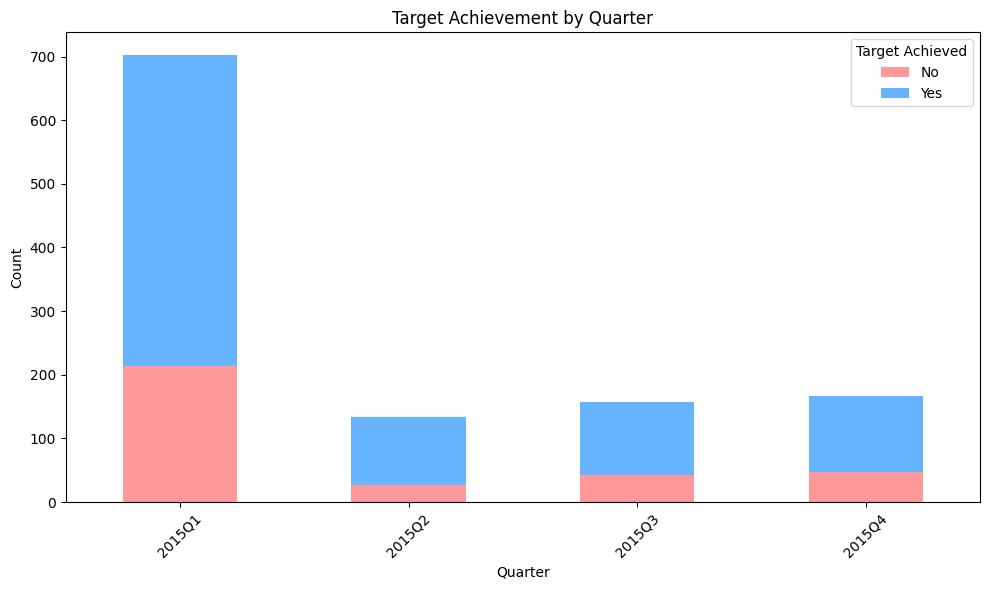

In [ ]:
# Convert the "Date" column to datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')


# Group data by quarters
data_cleaned['Quarter'] = data_cleaned['Date'].dt.to_period('Q')
grouped_data = data_cleaned.groupby(['Quarter', 'Target Achieved']).size().unstack(fill_value=0)

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, ax=ax, color=['#FF9999', '#66B3FF'])

# Customize labels and titles
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.title('Target Achievement by Quarter')
plt.xticks(rotation=45)
plt.legend(title='Target Achieved', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

The graph "Target Achievement by Quarter" shows the number of targets achieved and not achieved for four different quarters: 19/Q1, 19/Q2, 20/Q3, and 20/Q4. In 19/Q1, a significant number of targets were achieved, while in subsequent quarters, the number of targets both achieved and not achieved decreased.

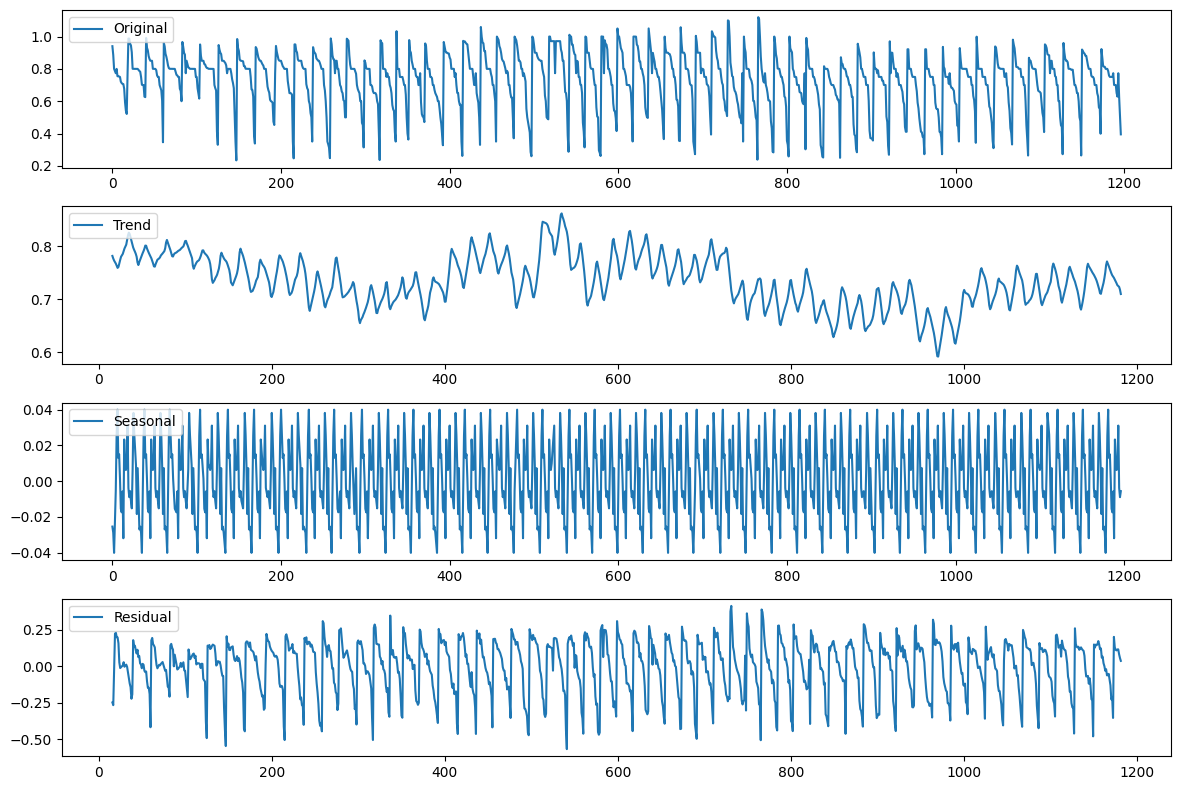

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonal, and residual components
result = seasonal_decompose(data_cleaned['Actual Productivity'], model='additive', period=30)
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data_cleaned['Actual Productivity'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Conducting the Augmented Dickey-Fuller test to check for stationarity
adf_test = adfuller(data_cleaned['Actual Productivity'])

# Outputting the results
adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used',
                                             'Number of Observations Used'])
for key, value in adf_test[4].items():
 adf_output[f'Critical Value ({key})'] = value
adf_output

Test Statistic                   -4.133124
p-value                           0.000853
#Lags Used                       20.000000
Number of Observations Used    1140.000000
Critical Value (1%)              -3.436099
Critical Value (5%)              -2.864079
Critical Value (10%)             -2.568122
dtype: float64

In [ ]:
# Calculate the moving average for the target variable (e.g., 'feature1')
def calculate_moving_average(series, window=7):
    return series.rolling(window=window).mean()

# Assuming you have already loaded the data and cleaned it (data_cleaned)

# Select the target variable for moving average calculation
target_variable = 'Actual Productivity'

# Calculate the moving average
data_cleaned['Moving Average'] = calculate_moving_average(data_cleaned[target_variable])

# Print the updated DataFrame
print(data_cleaned)

           Date Quarter Department  Targeted Productivity  Overtime  \
0    2015-01-01  2015Q1     Sewing                   0.80      7080   
1    2015-01-01  2015Q1  Finishing                   0.75       960   
2    2015-01-01  2015Q1     Sewing                   0.80      3660   
4    2015-01-01  2015Q1     Sewing                   0.80      1920   
5    2015-01-01  2015Q1     Sewing                   0.80      6720   
...         ...     ...        ...                    ...       ...   
1192 2015-11-03  2015Q4  Finishing                   0.75       960   
1193 2015-11-03  2015Q4  Finishing                   0.70       960   
1194 2015-11-03  2015Q4  Finishing                   0.65       960   
1195 2015-11-03  2015Q4  Finishing                   0.75      1800   
1196 2015-11-03  2015Q4  Finishing                   0.70       720   

      No. of Workers  Actual Productivity Target Achieved  Moving Average  
0               59.0             0.940725             Yes             N

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                SARIMAX Results                                
Dep. Variable:     Actual Productivity   No. Observations:                 1161
Model:                  ARIMA(5, 0, 0)   Log Likelihood                 664.037
Date:                 Fri, 19 Apr 2024   AIC                          -1314.073
Time:                         13:29:29   BIC                          -1278.674
Sample:                              0   HQIC                         -1300.717
                                - 1161                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7339      0.016     44.966      0.000       0.702       0.766
ar.L1          0.6266      0.038     16.319      0.000       0.551       0.702
ar.L2         -0.0092      0.047     -0.195 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


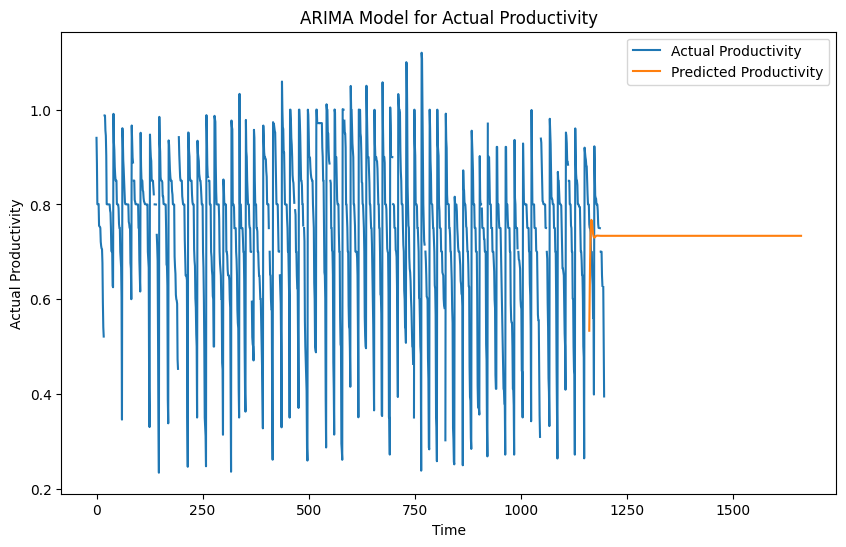

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Define the model
quarterly_actual_productivity=data_cleaned['Actual Productivity']
model = ARIMA(quarterly_actual_productivity, order=(5, 0, 0))

# Fit the model
results = model.fit()

print(results.summary())

# Make predictions
forecast_horizon = 500
forecast = results.forecast(steps=forecast_horizon)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Actual Productivity'], label='Actual Productivity')
plt.plot(forecast, label='Predicted Productivity')
plt.xlabel('Time')
plt.ylabel('Actual Productivity')
plt.title('ARIMA Model for Actual Productivity')
plt.legend()
plt.show()


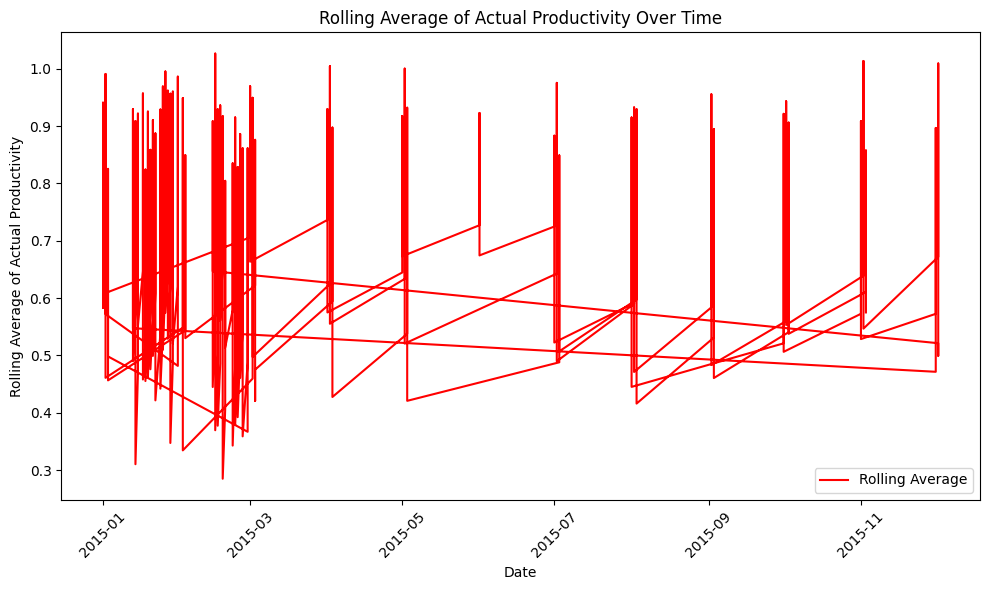

In [ ]:
#calculation of rolling average
data_cleaned['Rolling Average'] = data_cleaned['Actual Productivity'].rolling(window=4, min_periods=1).mean()

#loting of olling average
plt.figure(figsize=(10, 6))
plt.plot(data_cleaned['Date'], data_cleaned['Rolling Average'], label='Rolling Average', color='red')
plt.xlabel('Date')
plt.ylabel('Rolling Average of Actual Productivity')
plt.title('Rolling Average of Actual Productivity Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE)
actual_productivity = data_cleaned['Actual Productivity']
predicted_productivity = forecast
mape = np.mean(np.abs((actual_productivity - predicted_productivity) / actual_productivity)) * 100
print("Mean Absolute Percentage Error:", mape)

# Calculate Mean Squared Error (MSE)
mse = np.mean((actual_productivity - predicted_productivity)**2)
print("Mean Squared Error:", mse)

Mean Absolute Percentage Error: 16.082104038062983
Mean Squared Error: 0.01610985383126136


In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE)
actual_productivity = data_cleaned['Actual Productivity']
predicted_productivity = data_cleaned['Rolling Average']
mape = np.mean(np.abs((actual_productivity - predicted_productivity) / actual_productivity)) * 100
print("Mean Absolute Percentage Error:", mape)

# Calculate Mean Squared Error (MSE)
mse = np.mean((actual_productivity - predicted_productivity)**2)
print("Mean Squared Error:", mse)

Mean Absolute Percentage Error: 11.899590359841055
Mean Squared Error: 0.015993238701184298


The comparison of ARIMA and a rolling average model using Mean Absolute Percentage Error (MAPE) and Mean Squared Error (MSE) reveals that the rolling average model outperforms the ARIMA model in terms of MAPE (11.90% compared to 16.08%) and MSE (0.0160 compared to 0.0161). However, both models have similar MSE values, with the rolling average model having a slightly lower MSE (0.0160 compared to 0.0161). It's crucial to consider factors like computational complexity, interpretability, and data characteristics before making a final decision on model selection.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = data_cleaned[['Overtime', 'Actual Productivity']]
y = data_cleaned['No. of Workers']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Prepare new data for prediction
new_data = {'Overtime': 0, 'Actual Productivity': 0.8}
new_data_array = np.array(list(new_data.values())).reshape(1, -1)
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predicted_workers = model.predict(new_data_array)

# Print the predicted number of workers
print(f'Predicted number of workers: {predicted_workers[0]}')


Predicted number of workers: 33.34588204403221
